# Assignment 7

## 1. Importing Data and Libraries:

In [2]:
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly
#!pip install ipykernel
#!pip install --upgrade nbformat
#!pip install hvplot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [4]:
# Read the CSV file into DataFrame
file_path = "adult.data"
df = pd.read_csv(file_path, sep=',', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Assign the first row as column names
df.columns = ["age", "workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Exploratory Data Analysis (EDA):

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df = df.convert_dtypes()
df.dtypes

age                        Int64
workclass         string[python]
fnlwgt                     Int64
education         string[python]
education-num              Int64
marital-status    string[python]
occupation        string[python]
relationship      string[python]
race              string[python]
sex               string[python]
capital-gain               Int64
capital-loss               Int64
hours-per-week             Int64
native-country    string[python]
income            string[python]
dtype: object

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
# see the basic statistics of the data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.581647,189778.366512,10.080679,1077.648844,87.30383,40.437456
std,13.640433,105549.977697,2.57272,7385.292085,402.960219,12.347429
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


In [12]:
counts = df['education'].value_counts(sort=True)
print(counts)
labels = counts.index
values = counts.values
print(values)

pie = go.Pie(labels=labels, values=values, marker=dict(colors=px.colors.qualitative.Pastel+px.colors.qualitative.Pastel1+px.colors.qualitative.Pastel2))
layout = go.Layout(title='Number of People in Differenct Education Level')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: Int64
<IntegerArray>
[10501,  7291,  5355,  1723,  1382,  1175,  1067,   933,   646,   576,   514,
   433,   413,   333,   168,    51]
Length: 16, dtype: Int64


In [13]:
df['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: string

Text(0.5, 1.0, 'Working hours per week')

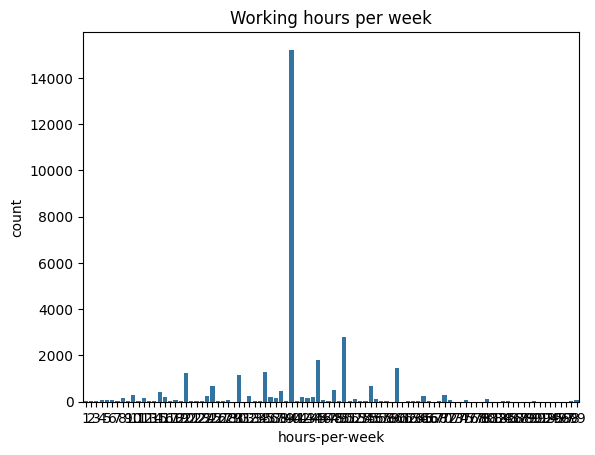

In [14]:
# take a closer look at the distribution of Reason for absence
ax = sns.countplot(x='hours-per-week', data=df)

plt.rcParams["figure.figsize"] = (30, 8)
plt.rcParams["xtick.labelsize"] = 8
plt.title('Working hours per week')

The majority of people works 40 hours per week. 50hrs/week and 45hrs/week are the second and third most common workings hours

## 3. Hypothesis Formulation:

### 1. The first hypothesis people with high income tends to work more hours

Text(0, 0.5, 'Hours per week')

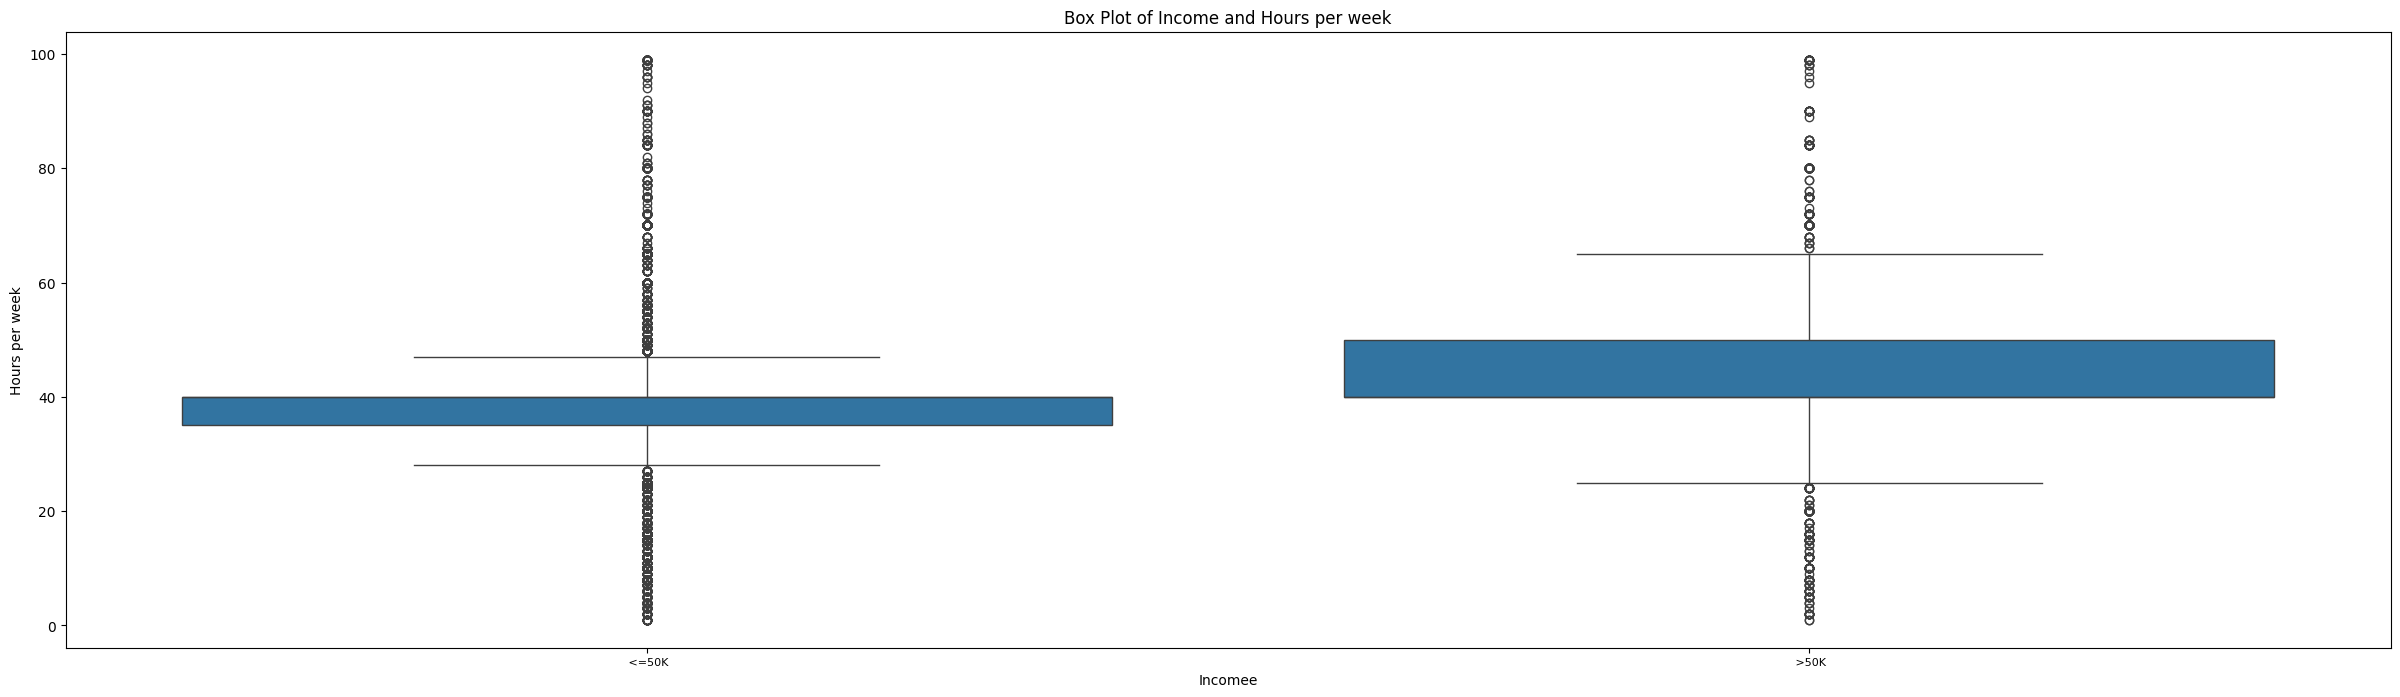

In [15]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Box Plot of Income and Hours per week')
plt.xlabel('Incomee')
plt.ylabel('Hours per week')

From the boxplot we can see that average people with low income(<=50K) works for 40 hours per week, and people with high income works between 45 and 50 hours per week. Based on the box pot, we can conclude that people with high income works more than people with low income

### 2. The second hypothesis is that a larger proportion of the white population belongs to the high-income category.

<Axes: xlabel='race', ylabel='count'>

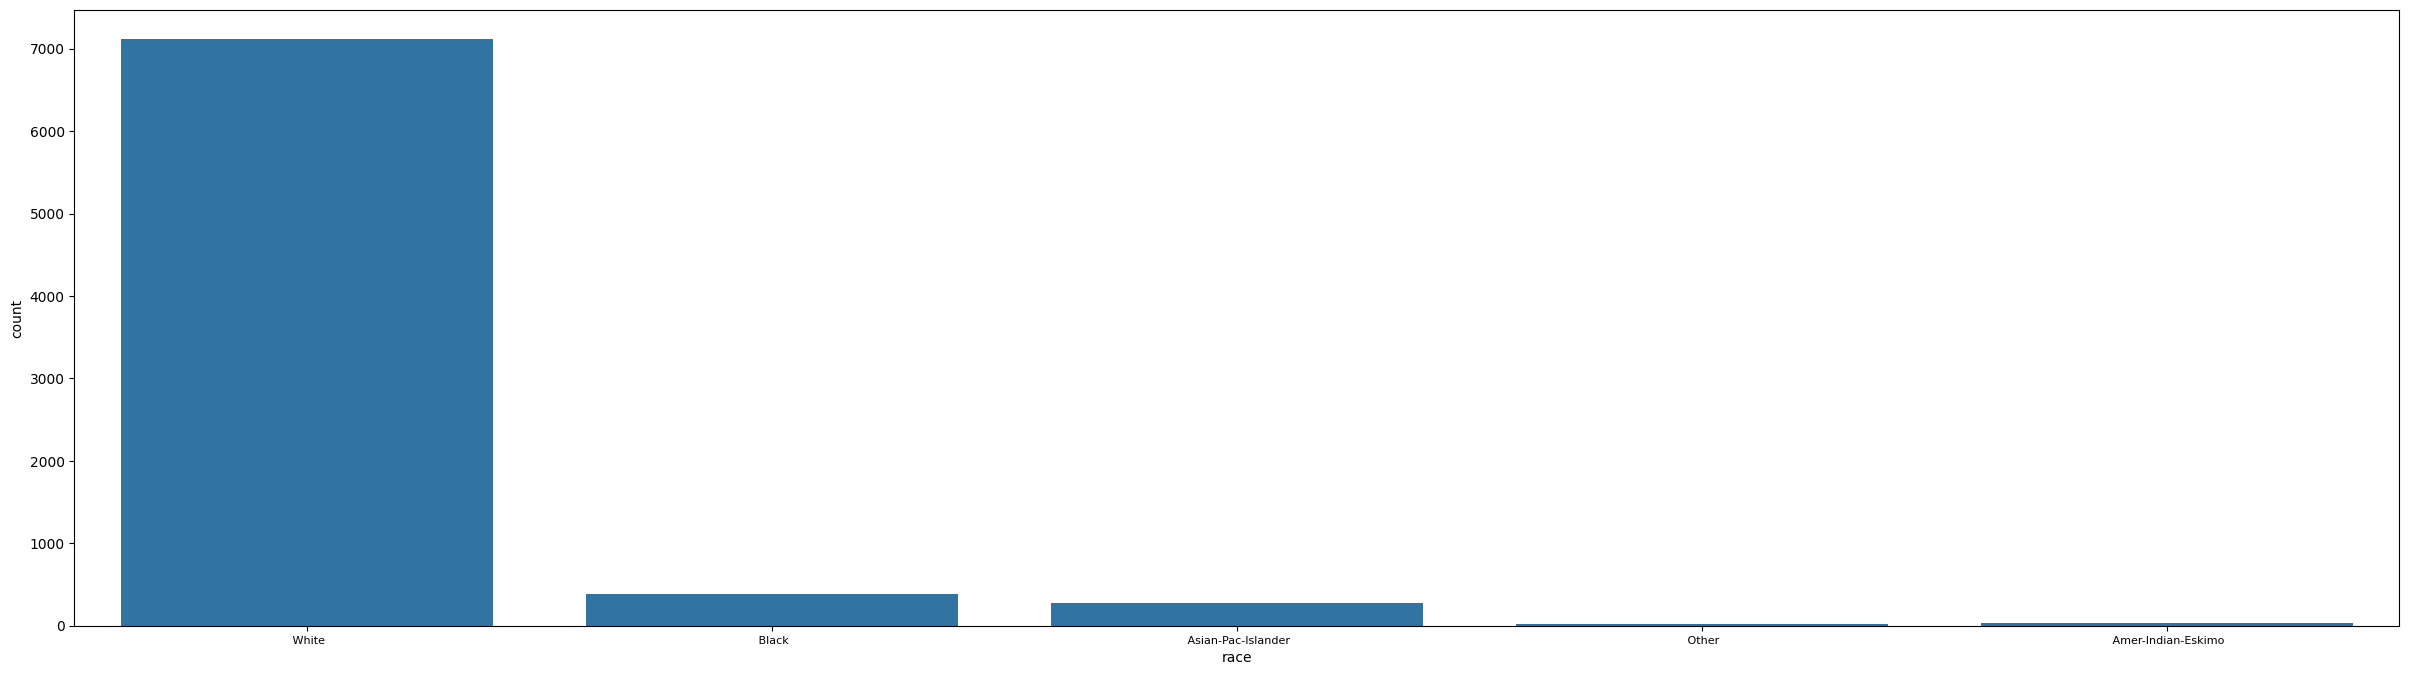

In [16]:
newDf = df[df['income'].str.contains(">50K")]
sns.countplot(x='race', data=newDf)

From the bar chart, it's evident that the number of white high-income individuals significantly outweighs the number of high-income individuals from other races.

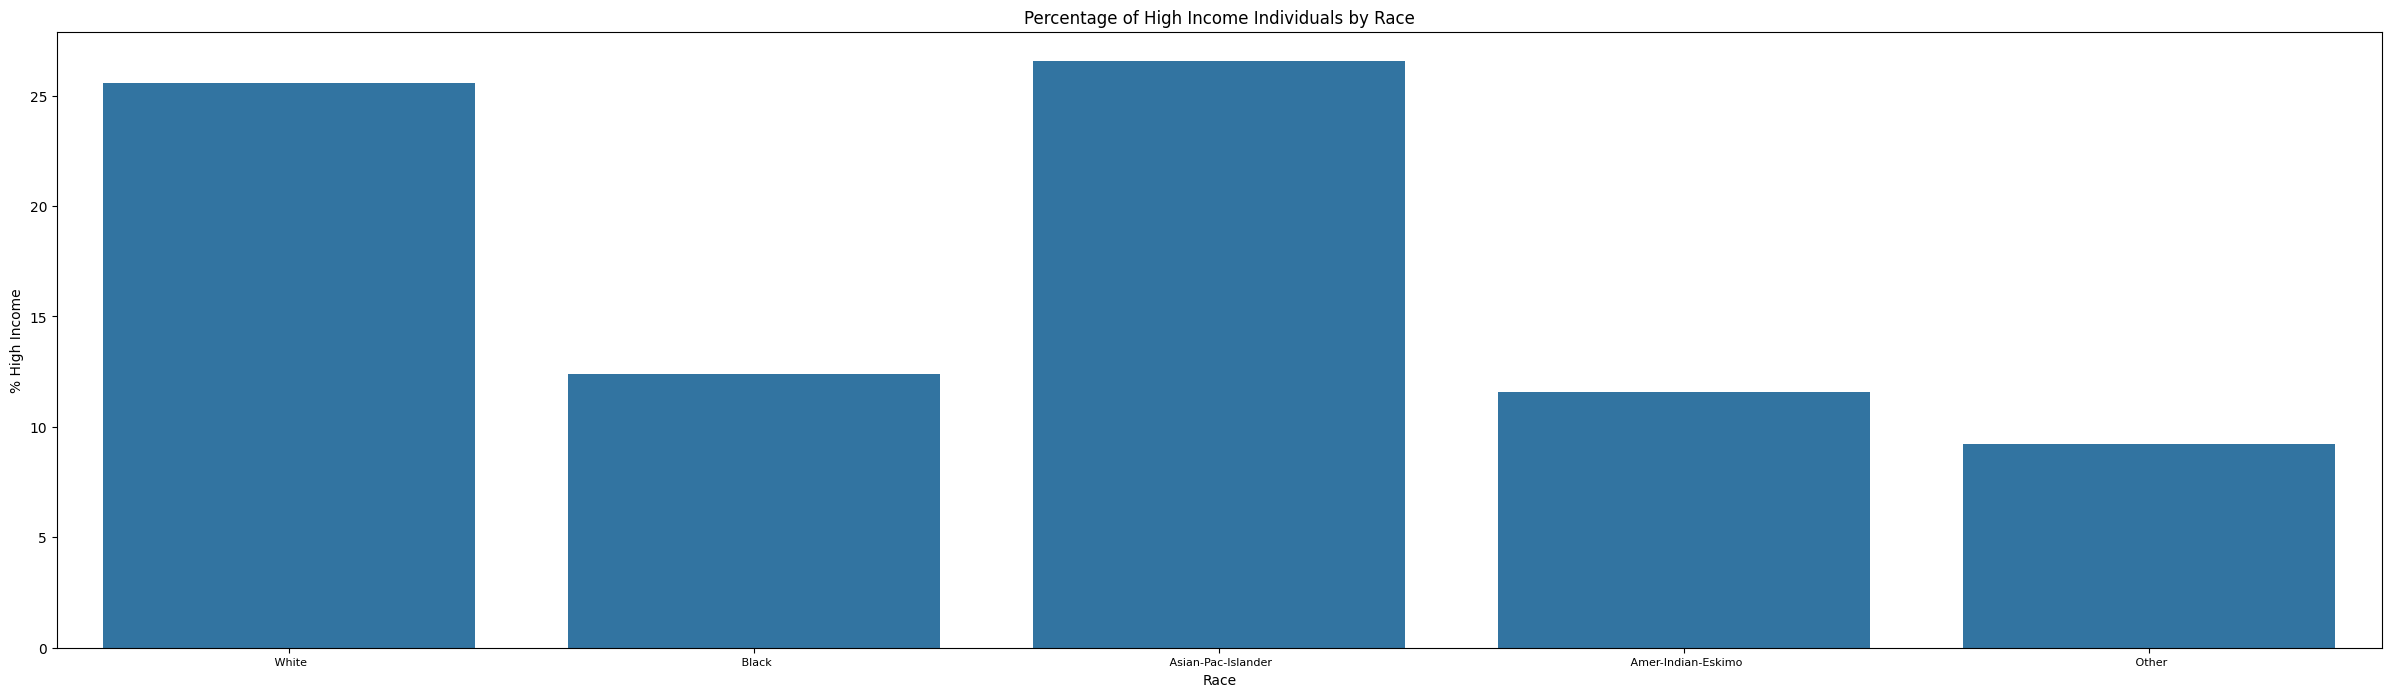

In [17]:

# Filter DataFrame for individuals with income >50K
high_income_df = df[df['income'].str.contains(">50K")]

# Group by race and count the number of individuals in each race
race_counts = df['race'].value_counts()

# Group by race and count the number of high-income individuals in each race
high_income_counts = high_income_df['race'].value_counts()

# Calculate the percentage of high-income individuals in each race
percent_high_income = (high_income_counts / race_counts) * 100

# Plot the percentage of high-income individuals in each race
sns.barplot(x=percent_high_income.index, y=percent_high_income.values)
plt.xlabel('Race')
plt.ylabel('% High Income')
plt.title('Percentage of High Income Individuals by Race')
plt.show()

However, considering that the majority of individuals in our dataset are white, a closer examination using percentages reveals that while white individuals comprise a substantial portion at 25%, the Asian-Pac-Islander group exhibits the highest proportion of high-income individuals. In conclusion, although white individuals constitute the largest population of high-income earners, the Asian-Pac-Islander group boasts the highest percentage among their own race.